# Time Series Basics

In [94]:
import pandas as pd
from pathlib import Path
from datetime import timedelta as td
import dateutil.parser
%matplotlib inline

In [95]:
# Read the Amazon stock prices CSV file as a time series DataFrame 
# Be sure to set the `Date` column as the index
df = pd.read_csv(Path('../Resources/amazon.csv'), parse_dates=True, index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,2026.500000,2050.500000,2013.000000,2039.510010,2039.510010,5721100
2018-09-05,2038.109985,2040.380005,1989.890015,1994.819946,1994.819946,8220600
2018-09-06,2006.510010,2007.500000,1935.209961,1958.310059,1958.310059,7488700
2018-09-07,1938.709961,1975.199951,1937.349976,1952.069946,1952.069946,4892600
2018-09-10,1971.000000,1973.040039,1931.520020,1939.010010,1939.010010,4544800


### Slice Time Series Data

In [96]:
# Select all rows from September 2018
sept_2018 = df[df.index > dateutil.parser.parse("2018-08-31")]
sept_2018.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,2026.500000,2050.500000,2013.000000,2039.510010,2039.510010,5721100
2018-09-05,2038.109985,2040.380005,1989.890015,1994.819946,1994.819946,8220600
2018-09-06,2006.510010,2007.500000,1935.209961,1958.310059,1958.310059,7488700
2018-09-07,1938.709961,1975.199951,1937.349976,1952.069946,1952.069946,4892600
2018-09-10,1971.000000,1973.040039,1931.520020,1939.010010,1939.010010,4544800


In [97]:
# Select all rows from September through October for 2018
sept_oct_2018 = sept_2018[sept_2018.index < dateutil.parser.parse("2018-11-01")]
sept_oct_2018.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,2026.500000,2050.500000,2013.000000,2039.510010,2039.510010,5721100
2018-09-05,2038.109985,2040.380005,1989.890015,1994.819946,1994.819946,8220600
2018-09-06,2006.510010,2007.500000,1935.209961,1958.310059,1958.310059,7488700
2018-09-07,1938.709961,1975.199951,1937.349976,1952.069946,1952.069946,4892600
2018-09-10,1971.000000,1973.040039,1931.520020,1939.010010,1939.010010,4544800


### Plot Time Series Data

<AxesSubplot:xlabel='Date'>

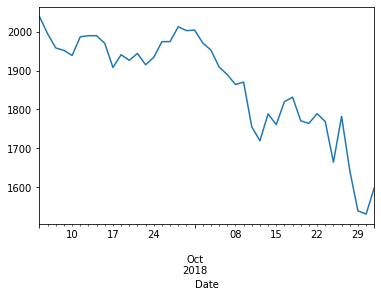

In [98]:
# Plot the closing prices using a line plot

sept_oct_2018.Close.plot()

### Resample Time Series Data

In [99]:
# Resample the closing prices to weekly and take the mean
weekly_closing_prices = sept_oct_2018.resample('W').mean()
weekly_closing_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-09,2002.457489,2018.394989,1968.862488,1986.177490,1986.177490,6580750.0
2018-09-16,1977.240015,1992.866016,1950.441992,1975.243994,1975.243994,4251180.0
2018-09-23,1941.335986,1953.631982,1910.100000,1926.962036,1926.962036,5077300.0
2018-09-30,1962.568017,1990.144019,1950.081983,1979.947998,1979.947998,4296020.0
2018-10-07,1974.133984,1984.271973,1935.715991,1945.500024,1945.500024,5638720.0


<AxesSubplot:xlabel='Date'>

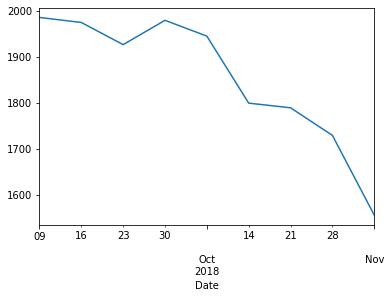

In [100]:
# Plot the weekly average closing prices as a line chart
weekly_closing_prices.Close.plot()

# Optional Challenge

In [101]:
# Use resample to get the highest closing price per month
highest_closing_price_per_month = sept_oct_2018.resample('M').max()
highest_closing_price_per_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-30,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,8220600
2018-10-31,2021.989990,2033.189941,2003.599976,2004.359985,2004.359985,14963800


<AxesSubplot:xlabel='Date'>

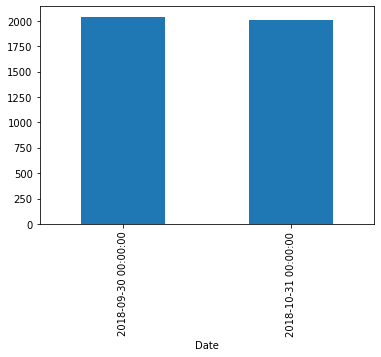

In [102]:
# Create a bar chart of the result
highest_closing_price_per_month.Close.plot()

In [103]:
df1 = sept_oct_2018.Close.resample('M').max()
df1

Date
2018-09-30    2039.510010
2018-10-31    2004.359985
Freq: M, Name: Close, dtype: float64

In [104]:
df2 = sept_oct_2018.resample('M').max()
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-30,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,8220600
2018-10-31,2021.989990,2033.189941,2003.599976,2004.359985,2004.359985,14963800
